In [3]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
np.random.seed(777)

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

170500096/170498071 [==============================] - 408s 2us/step


In [11]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(33500, 32, 32, 3)
(16500, 32, 32, 3)
(33500, 1)
(16500, 1)


<class 'numpy.ndarray'>
<class 'module'>


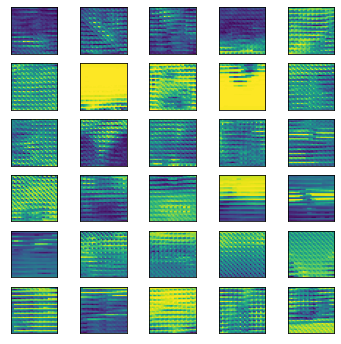

In [59]:
sample_size = 30
random_idx = np.random.randint(33500, size = sample_size)
plt.figure(figsize = (6, 6))


# # 클래스 이름 추출하기
print(type(x_train))
print(type(cifar10))
# # print(cifar10.labels)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


for i, idx in enumerate(random_idx):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
#     plt.xlabel(class_names[t_train[i]])
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

In [29]:
from tensorflow.keras.utils import to_categorical
x_train = np.reshape(x_train / 255, (-1, 32, 32, 1))
x_test = np.reshape(x_test / 255, (-1, 32, 32, 1))

t_train = to_categorical(t_train)
t_test = to_categorical(t_test)


from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x_train, t_train, test_size = 0.33, random_state = 777)

ValueError: Found input variables with inconsistent numbers of samples: [67335, 22445]

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential([
    Conv2D(filters = 16, kernel_size = 3, padding = 'same',
          activation = 'relu', input_shape = (32, 32, 3)),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])